## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Import Dataset

In [2]:
dataset = pd.read_csv('./dataset/finace_data.csv')

In [3]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## Shape of dataset

In [4]:
dataset.shape

(5070, 15)

## Making Data column as index 

In [5]:
dataset.set_index('Date', inplace = True)

In [6]:
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## Checking trend of VWAP (Volume weighted average price)

<AxesSubplot:xlabel='Date'>

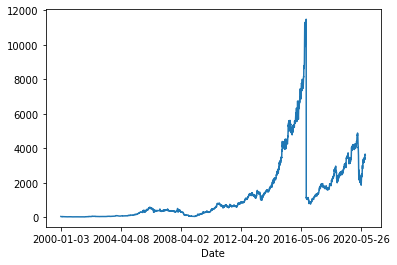

In [7]:
dataset['VWAP'].plot()

## Checking null values

In [8]:
dataset.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

## Drop Missing Values

In [9]:
dataset.dropna(inplace = True)

In [10]:
dataset.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [11]:
dataset.shape

(2291, 14)

In [12]:
data = dataset.copy()

In [13]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

## Feature Engineering

In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [15]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']

window_01 = 3
window_02 = 7

In [16]:
for features in lag_features:
    data[features+' rolling_mean_3'] =  data[features].rolling(window_01).mean()
    data[features+' rolling_mean_7'] =  data[features].rolling(window_02).mean()
    

In [17]:
for features in lag_features:
    data[features+' rolling_std_3'] =  data[features].rolling(window_01).std()
    data[features+' rolling_std_7'] =  data[features].rolling(window_02).std()
    

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High rolling_std_3,High rolling_std_7,Low rolling_std_3,Low rolling_std_7,Volume rolling_std_3,Volume rolling_std_7,Turnover rolling_std_3,Turnover rolling_std_7,Trades rolling_std_3,Trades rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [19]:
data.shape

(2291, 34)

In [20]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High rolling_mean_3        2
High rolling_mean_7        6
Low rolling_mean_3         2
Low rolling_mean_7         6
Volume rolling_mean_3      2
Volume rolling_mean_7      6
Turnover rolling_mean_3    2
Turnover rolling_mean_7    6
Trades rolling_mean_3      2
Trades rolling_mean_7      6
High rolling_std_3         2
High rolling_std_7         6
Low rolling_std_3          2
Low rolling_std_7          6
Volume rolling_std_3       2
Volume rolling_std_7       6
Turnover rolling_std_3     2
Turnover rolling_std_7     6
Trades rolling_std_3       2
Trades rolling_std_7       6
dtype: int64

In [21]:
data.dropna(inplace = True)

In [22]:
data.isna().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High rolling_mean_3        0
High rolling_mean_7        0
Low rolling_mean_3         0
Low rolling_mean_7         0
Volume rolling_mean_3      0
Volume rolling_mean_7      0
Turnover rolling_mean_3    0
Turnover rolling_mean_7    0
Trades rolling_mean_3      0
Trades rolling_mean_7      0
High rolling_std_3         0
High rolling_std_7         0
Low rolling_std_3          0
Low rolling_std_7          0
Volume rolling_std_3       0
Volume rolling_std_7       0
Turnover rolling_std_3     0
Turnover rolling_std_7     0
Trades rolling_std_3       0
Trades rolling_std_7       0
dtype: int64

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High rolling_mean_3', 'High rolling_mean_7',
       'Low rolling_mean_3', 'Low rolling_mean_7', 'Volume rolling_mean_3',
       'Volume rolling_mean_7', 'Turnover rolling_mean_3',
       'Turnover rolling_mean_7', 'Trades rolling_mean_3',
       'Trades rolling_mean_7', 'High rolling_std_3', 'High rolling_std_7',
       'Low rolling_std_3', 'Low rolling_std_7', 'Volume rolling_std_3',
       'Volume rolling_std_7', 'Turnover rolling_std_3',
       'Turnover rolling_std_7', 'Trades rolling_std_3',
       'Trades rolling_std_7'],
      dtype='object')

In [24]:
ind_features = ['High rolling_mean_3', 'High rolling_mean_7',
       'Low rolling_mean_3', 'Low rolling_mean_7', 'Volume rolling_mean_3',
       'Volume rolling_mean_7', 'Turnover rolling_mean_3',
       'Turnover rolling_mean_7', 'Trades rolling_mean_3',
       'Trades rolling_mean_7', 'High rolling_std_3', 'High rolling_std_7',
       'Low rolling_std_3', 'Low rolling_std_7', 'Volume rolling_std_3',
       'Volume rolling_std_7', 'Turnover rolling_std_3',
       'Turnover rolling_std_7', 'Trades rolling_std_3',
       'Trades rolling_std_7']